In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

## Spatial aggregation.

Q1]Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [153]:
import pandas as pd
df = pd.read_csv("Data.csv")  
state_avg_pm25 = df.groupby("state")["PM2.5"].mean()
highest_pm25_state = state_avg_pm25.idxmax()
highest_pm25_value = state_avg_pm25.max()
print(f"State with the highest average PM2.5 concentration is {highest_pm25_state} with an average PM2.5 level of {highest_pm25_value:.2f}")

State with the highest average PM2.5 concentration is Delhi with an average PM2.5 level of 104.10


Q2

In [155]:
import pandas as pd
df = pd.read_csv("Data.csv") 
# Convert Timestamp column to datetime format
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Filter for the year 2023
df_2023 = df[df["Timestamp"].dt.year == 2023]

# Drop rows where PM2.5 is less than 300
hazardous_days = df_2023[df_2023['PM2.5']>300]

hazardous_days_count=hazardous_days.groupby('state')['Timestamp'].nunique() # nunique counts the number of unique entries column wise and creates a pd series

most_hazardous_state = hazardous_days_count.idxmax()
most_hazardous_days = hazardous_days_count.max()
print(f"state with the most hazardous PM2.5 days in 2023 is {most_hazardous_state} with {most_hazardous_days} days.")


state with the most hazardous PM2.5 days in 2023 is Delhi with 49 days.


Q3

In [157]:
state_variability = df_2023.groupby("state")["PM2.5"].std()

# Finding the state with the highest variability(i.e. standard deviation)
most_variable_state = state_variability.idxmax()
highest_std = state_variability.max()
print(f"State with highest variability in PM2.5: {most_variable_state} (Std Dev: {highest_std:.2f})")

State with highest variability in PM2.5: Delhi (Std Dev: 82.80)


Q4

In [159]:
import pandas as pd
df = pd.read_csv("Data.csv")
#filter the timestamp during the covid era(2020-2021)
df['Timestamp']=pd.to_datetime(df['Timestamp'])
df_2020_2021= df[(df['Timestamp'].dt.year==2020) | (df['Timestamp'].dt.year==2021)]

#group by state
df_2020_2021=df_2020_2021.groupby('state')['PM2.5'].mean()

lowest_pm25_state = df_2020_2021.idxmin()
lowest_pm25_value = df_2020_2021.min()

print(f"State with the lowest average PM2.5 levels (2020-2021): {lowest_pm25_state} (Avg PM2.5: {lowest_pm25_value:.2f})")

State with the lowest average PM2.5 levels (2020-2021): Mizoram (Avg PM2.5: 14.32)



## Temporal Aggregation 

Q1] Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [161]:
import pandas as pd
df = pd.read_csv("Data.csv")
df['Timestamp']=pd.to_datetime(df['Timestamp'])
#filter the df in year 2020
df_2020=df[df['Timestamp'].dt.year==2020]
#filter in month
df_2020_aug=df_2020[df_2020['Timestamp'].dt.month==8]

df_grpby_station=df_2020_aug.groupby('station')['PM2.5'].max()

station=df_grpby_station.idxmax()
value=df_grpby_station.max()
print(f"Station with highest PM2.5 in Aug 2020: {station} (PM2.5: {value:.2f})")


Station with highest PM2.5 in Aug 2020: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB (PM2.5: 805.51)


Q2]

In [163]:
import pandas as pd
df = pd.read_csv("Data.csv")
df['Timestamp']=pd.to_datetime(df['Timestamp'])
#filter the df in year 2018
df_2018=df[df['Timestamp'].dt.year==2018]

#filter in summer
df_2018_sum=df_2018[df_2018['Timestamp'].dt.month.isin( [3,4,5])]

#filter in winter
df_2018_win=df_2018[df_2018['Timestamp'].dt.month.isin ([12,1,2])]

#filter in monsoon
df_2018_mon=df_2018[df_2018['Timestamp'].dt.month.isin ([6,7,8,9])]

df_2018_sum_lal=df_2018_sum[df_2018_sum['station']=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
df_2018_win_lal=df_2018_win[df_2018_win['station']=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
df_2018_mon_lal=df_2018_mon[df_2018_mon['station']=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
sum_val=df_2018_sum_lal['PM2.5'].mean()
win_val=df_2018_win_lal['PM2.5'].mean()
mon_val=df_2018_mon_lal['PM2.5'].mean()
dic={'summer':sum_val, 'winter':win_val,'monsoon':mon_val}
print(max(dic))

#Winter has the most pollution because cold air traps it, while monsoon has the least since rain cleans the air.

winter


Q3]

week day average value of PM2.5= 42.79,week end average value of PM2.5= 41.13 


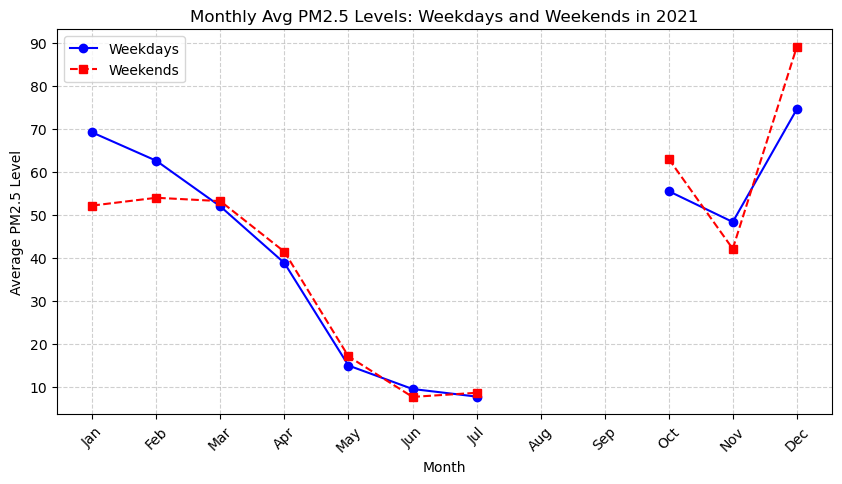

In [165]:
import pandas as pd
df = pd.read_csv("Data.csv")
df['Timestamp']=pd.to_datetime(df['Timestamp'])
#filter the df in year 2021
df_2021=df[df['Timestamp'].dt.year==2021]

#differentiating weekdays and weekends
df_2021_wdays=df_2021[df_2021['Timestamp'].dt.weekday<5]
df_2021_wends=df_2021[df_2021['Timestamp'].dt.weekday>=5]

#setting station to lal
df_2021_wdays_lal=df_2021_wdays[df_2021_wdays['station']=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
df_2021_wends_lal=df_2021_wends[df_2021_wends['station']=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB']
wdays_val=df_2021_wdays_lal['PM2.5'].mean()
wends_val=df_2021_wends_lal['PM2.5'].mean()

print(f"week day average value of PM2.5= {wdays_val:.2f},week end average value of PM2.5= {wends_val:.2f} ")

#a)

df_2021_wdays_lal['Month'] = df_2021_wdays_lal['Timestamp'].dt.month
df_2021_wends_lal['Month'] = df_2021_wends_lal['Timestamp'].dt.month
df_monthly_wdays = df_2021_wdays_lal.groupby('Month')['PM2.5'].mean().sort_index()
df_monthly_wends = df_2021_wends_lal.groupby('Month')['PM2.5'].mean().sort_index()

fig, axis = plt.subplots(figsize=(10, 5))
plt.plot(df_monthly_wdays, label="Weekdays", marker='o', linestyle='-', color='b')
plt.plot(df_monthly_wends, label="Weekends", marker='s', linestyle='--', color='r')


axis.set_xticks(range(1, 13)) #In simple words: You are saying, “Hey Matplotlib, I want my x-axis ticks to be at positions 1, 2, 3, ..., 12.”
axis.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axis.tick_params(axis='x', labelrotation=45)
plt.xlabel("Month")
plt.ylabel("Average PM2.5 Level")
plt.title("Monthly Avg PM2.5 Levels: Weekdays and Weekends in 2021")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)


plt.show()

## Spatio-temporal aggregation 

Q1] For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?


In [167]:
import pandas as pd
df = pd.read_csv("Data.csv")
df['Timestamp']=pd.to_datetime(df['Timestamp'])
#filter the df in year 2022
df_2022=df[df['Timestamp'].dt.year==2022]

#filter in summer
df_2022_sum=df_2022[df_2022['Timestamp'].dt.month.isin( [3,4,5])]

#filter in monsoon
df_2022_mon=df_2022[df_2022['Timestamp'].dt.month.isin ([6,7,8,9])]

# Group by state and calculate mean PM2.5 
summer_avg = df_2022_sum.groupby('state')['PM2.5'].mean()
monsoon_avg = df_2022_mon.groupby('state')['PM2.5'].mean()

# percentage change
percentage_change = (abs(monsoon_avg - summer_avg) / summer_avg) * 100

# state with the most difference
most_difference_state = percentage_change.idxmax()
most_difference_value = percentage_change.loc[most_difference_state]

# state with highest abs diff
max_difference=abs(monsoon_avg - summer_avg)
state_with_highest_abs_diff=max_difference.idxmax()

print(f"State with the most percentage change in PM2.5 levels: {most_difference_state}")
print(f"Percentage change: {most_difference_value:.2f}%")
print(f"State with the most absolute change in PM2.5 levels: {state_with_highest_abs_diff}")

State with the most percentage change in PM2.5 levels: Assam
Percentage change: 61.18%
State with the most absolute change in PM2.5 levels: Delhi


Q2}

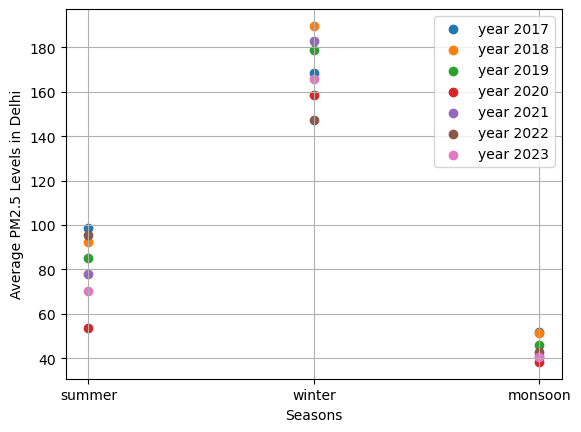

In [169]:
import pandas as pd
df = pd.read_csv("Data.csv")
df['Timestamp']=pd.to_datetime(df['Timestamp'])
fig,ax=plt.subplots()
for i in [2017,2018,2019,2020,2021,2022,2023]:
    df_year_i=df[df['Timestamp'].dt.year==i]
    #filter in summer
    df_year_i_sum=df_year_i[df_year_i['Timestamp'].dt.month.isin( [3,4,5])]
    #filter in winter
    df_year_i_win=df_year_i[df_year_i['Timestamp'].dt.month.isin( [12,1,2])]
    #filter in monsoon
    df_year_i_mon=df_year_i[df_year_i['Timestamp'].dt.month.isin( [6,7,8,9])]
    #filter by city delhi
    df_year_i_sum_delhi=df_year_i_sum[df_year_i_sum['city']=='Delhi']
    df_year_i_win_delhi=df_year_i_win[df_year_i_win['city']=='Delhi']
    df_year_i_mon_delhi=df_year_i_mon[df_year_i_mon['city']=='Delhi']

    sum_avg=df_year_i_sum_delhi['PM2.5'].mean()
    win_avg=df_year_i_win_delhi['PM2.5'].mean()
    mon_avg=df_year_i_mon_delhi['PM2.5'].mean()
    dic={'summer':sum_avg, 'winter':win_avg,'monsoon':mon_avg}
    plt.scatter(list(dic.keys()),list(dic.values()),label=f'year {i}')
    plt.legend()
    plt.grid(True)
    plt.xlabel("Seasons")
    plt.ylabel("Average PM2.5 Levels in Delhi")


plt.show()
#Delhi's PM2.5 levels are highest in winter due to pollution getting trapped in cold air and lowest in monsoon because rain helps clean the air. Summer has moderate pollution, but dust and dry weather can sometimes increase PM2.5 levels.

Q3]

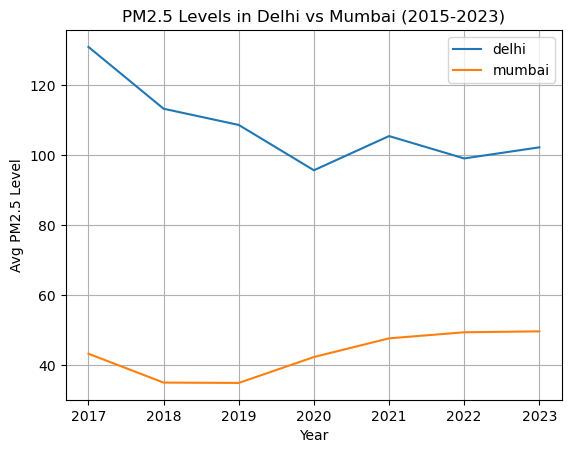

Standard deviation of Delhi=11.72
Standard deviation of Mumbai=6.27
Delhi has more fluctuation


In [171]:
import pandas as pd
df = pd.read_csv("Data.csv")
df['Timestamp']=pd.to_datetime(df['Timestamp'])
delhi=[]
mumbai=[]
for i in range(2015,2024):
    df_i = df[df["Timestamp"].dt.year ==i]
    df_delhi = df_i[df_i["city"] == "Delhi"]
    df_mumbai = df_i[df_i["city"] == "Mumbai"]
    # Calculate yearly average PM2.5
    delhi_avg = df_delhi['PM2.5'].mean()
    mumbai_avg = df_mumbai['PM2.5'].mean()
    delhi.append(delhi_avg)
    mumbai.append(mumbai_avg)

#Calculating standard deviations
del_series=pd.Series(delhi)
mumb_series=pd.Series(mumbai)
del_std=del_series.std()
mumb_std=mumb_series.std()

x=list(range(2015,2024))
plt.plot(x,delhi,label='delhi')
plt.plot(x,mumbai,label='mumbai')
plt.legend()
plt.grid(True)
plt.xlabel("Year")
plt.ylabel("Avg PM2.5 Level")
plt.title("PM2.5 Levels in Delhi vs Mumbai (2015-2023)")
plt.show()

print(f'Standard deviation of Delhi={del_std:.2f}')
print(f'Standard deviation of Mumbai={mumb_std:.2f}')
print('Delhi has more fluctuation')

## POPULATION BASED
Q - 1 Which state in India has the highest number of monitoring stations relative to its population? 

In [173]:
data_set = pd.read_csv(r"C:\Users\rohan\Downloads\Data.csv") 
State_data = pd.read_csv(r"C:\Users\rohan\Downloads\State_data.csv")
data = pd.read_csv(r"C:\Users\rohan\Downloads\Data.csv") 
state_data = pd.read_csv(r"C:\Users\rohan\Downloads\State_data.csv")

state_wise_monitoring_station = data_set.groupby(['state'])['station'].nunique() #or unique.apply(lambda x:x)

State_data=State_data.sort_values('State')
station_relative_to_population = (state_wise_monitoring_station.values/State_data['Population'])*1e6
a=station_relative_to_population.max()
print('State having the most number of monitoring station relative to its population is:',State_data.loc[station_relative_to_population.idxmax()]['State'],f"with value {a:.2f}")


State having the most number of monitoring station relative to its population is: Chandigarh with value 2.84


Q2]

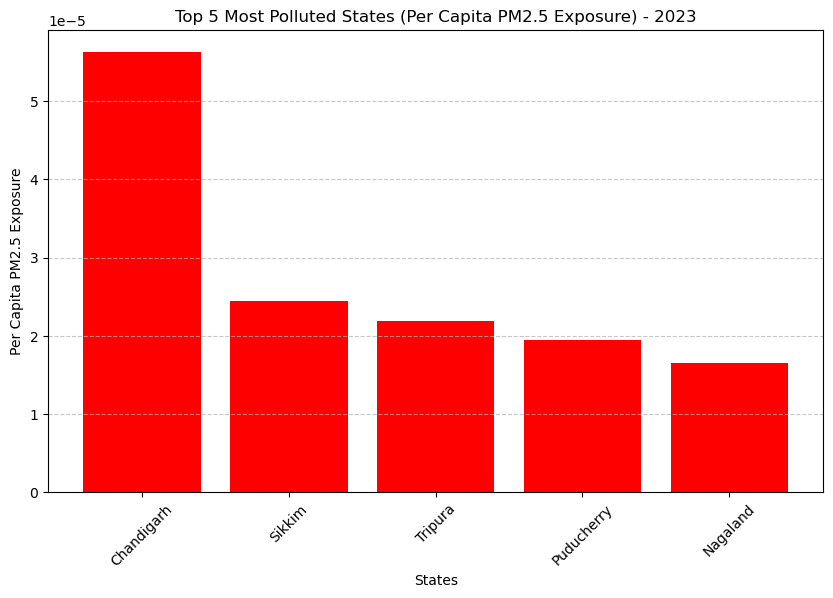

In [175]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])

# Filter for the year 2023
data_2023 = data[data["Timestamp"].dt.year == 2023]
state_pm25 = data_2023.groupby('state')['PM2.5'].mean()

state_pollution = state_data.merge(state_pm25.rename('Avg_PM2.5'), left_on='State', right_index=True, how='left')

state_pollution['Per_Capita_PM2.5'] = state_pollution['Avg_PM2.5'] / state_pollution['Population']

top_5_polluted = state_pollution.nlargest(5, 'Per_Capita_PM2.5')

plt.figure(figsize=(10, 6))
plt.bar(top_5_polluted['State'], top_5_polluted['Per_Capita_PM2.5'], color='red')
plt.xlabel("States")
plt.ylabel("Per Capita PM2.5 Exposure")
plt.title("Top 5 Most Polluted States (Per Capita PM2.5 Exposure) - 2023")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Q3]

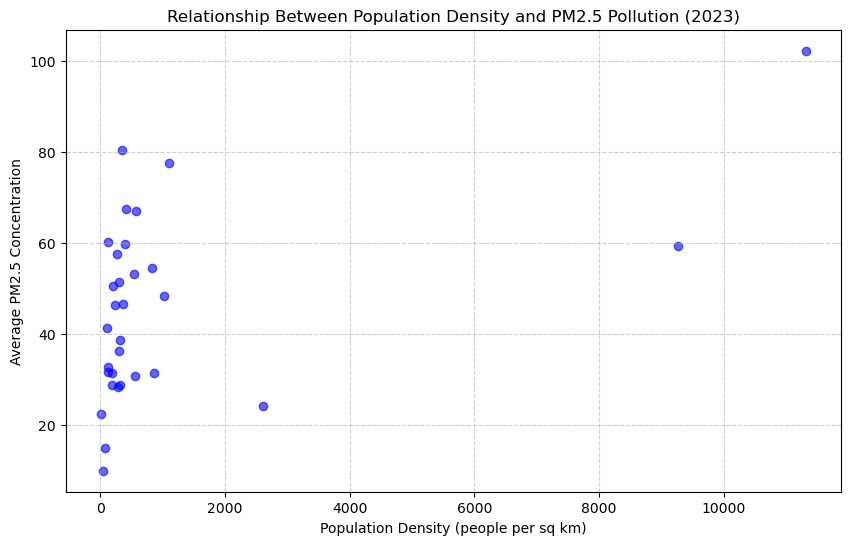

'There is less dependance of pollution upon population density.\nNaturally we would infer that as population increases the pollution increases, \nbut here we could see that even at similar population density, there are different pollution levels.'

In [177]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])


data_2023 = data[data["Timestamp"].dt.year == 2023]


state_pm25 = data_2023.groupby('state')['PM2.5'].mean().rename("Avg_PM2.5")


state_pollution = state_data.merge(state_pm25, left_on='State', right_index=True, how='left')


state_pollution['Population_Density'] = state_pollution['Population'] / state_pollution['Area (km2)']


plt.figure(figsize=(10, 6))
plt.scatter(state_pollution['Population_Density'], state_pollution['Avg_PM2.5'], color='blue', alpha=0.6)
plt.xlabel("Population Density (people per sq km)")
plt.ylabel("Average PM2.5 Concentration")
plt.title("Relationship Between Population Density and PM2.5 Pollution (2023)")
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

'''There is less dependance of pollution upon population density.
Naturally we would infer that as population increases the pollution increases, 
but here we could see that even at similar population density, there are different pollution levels.'''

## AREA-BASED
Q-1 Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
X-axis: States.
Y-axis: PM2.5 concentration per square kilometer.
Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


The state with the highest PM2.5 concentration per square kilometer is Chandigarh with 0.50 PM2.5/sq km.


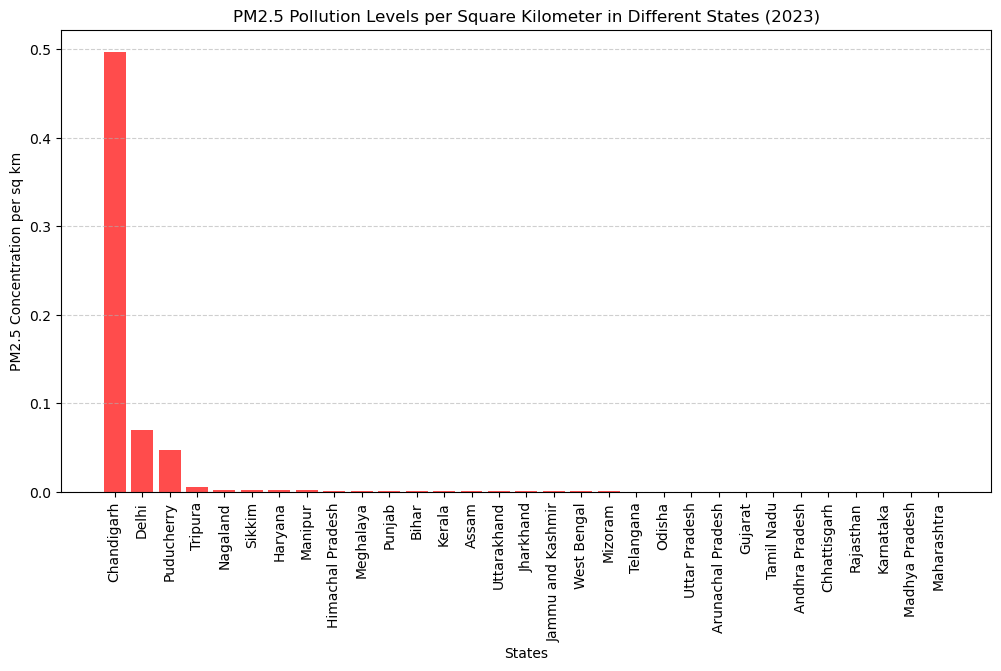

In [179]:

data["Timestamp"] = pd.to_datetime(data["Timestamp"])


data_2023 = data


state_pm25 = data_2023.groupby('state')['PM2.5'].mean().rename("Avg_PM2.5")


state_pollution = state_data.merge(state_pm25, left_on='State', right_index=True, how='left')


state_pollution['PM2.5_per_sq_km'] = state_pollution['Avg_PM2.5'] / state_pollution['Area (km2)']


most_polluted_state = state_pollution.loc[state_pollution['PM2.5_per_sq_km'].idxmax(), 'State']
max_pollution_value = state_pollution['PM2.5_per_sq_km'].max()

print(f"The state with the highest PM2.5 concentration per square kilometer is {most_polluted_state} with {max_pollution_value:.2f} PM2.5/sq km.")


state_pollution_sorted = state_pollution.sort_values(by='PM2.5_per_sq_km', ascending=False)


plt.figure(figsize=(12, 6))
plt.bar(state_pollution_sorted['State'], state_pollution_sorted['PM2.5_per_sq_km'], color='red', alpha=0.7)
plt.xticks(rotation=90) 
plt.xlabel("States")
plt.ylabel("PM2.5 Concentration per sq km")
plt.title("PM2.5 Pollution Levels per Square Kilometer in Different States (2023)")
plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.show()

Q2]

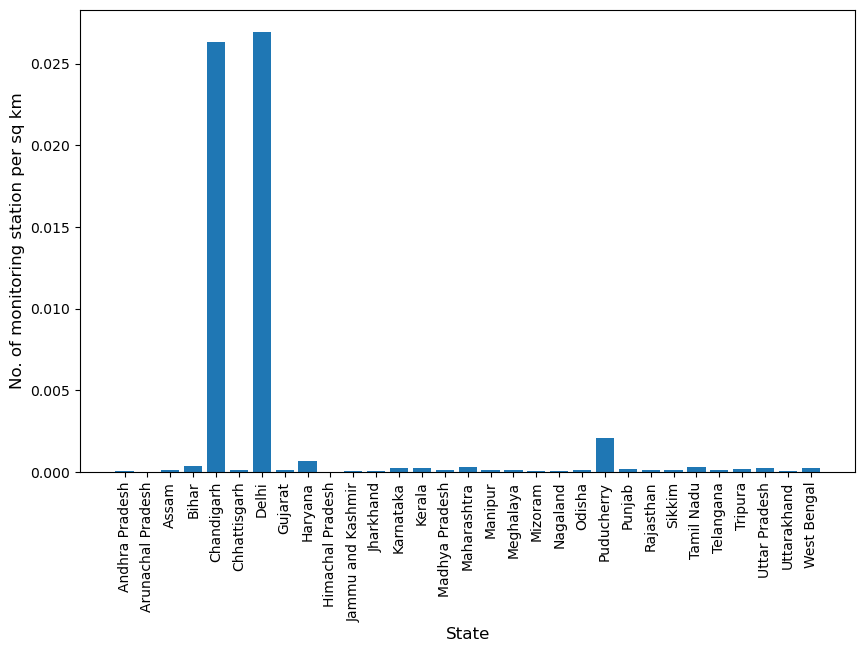

In [181]:
no_of_monitoring_station_by_state=data_set.groupby('state')['station'].nunique()

no_of_monitoring_station_per_sqkm = no_of_monitoring_station_by_state/State_data.set_index('State')['Area (km2)']

fig,ax=plt.subplots(figsize=(10,6))
ax.bar(no_of_monitoring_station_per_sqkm.index,no_of_monitoring_station_per_sqkm.values)
ax.set_xticks(np.arange(len(no_of_monitoring_station_per_sqkm)))
ax.set_xticklabels(no_of_monitoring_station_per_sqkm.index,rotation=90)
ax.set_xlabel('State',fontsize=12)
ax.set_ylabel('No. of monitoring station per sq km',fontsize=12)
plt.show()


Q3]

            State  Population  Area (km2)  Population_Density  Avg_PM2.5
1     Maharashtra   112374333      307713          365.192023  46.440044
4  Madhya Pradesh    72626809      308252          235.608557  47.095952


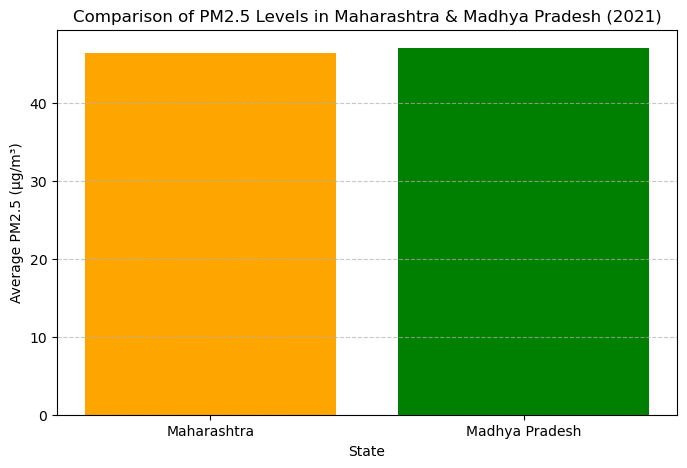

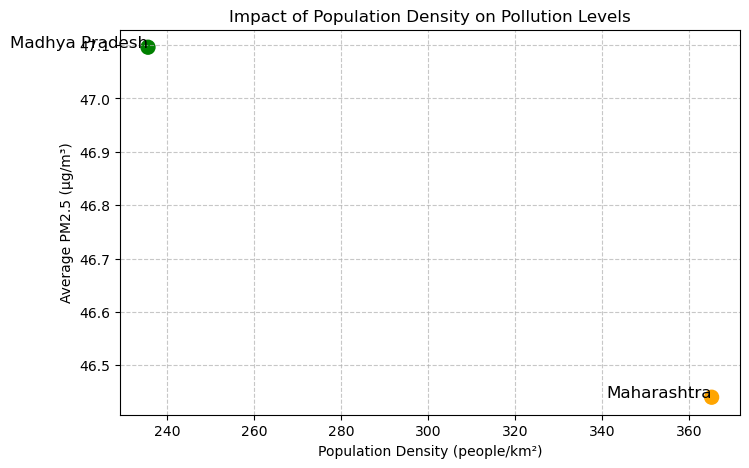

'The table shows that even when population density decreases, pollution levels still increase.\nThis means there is little connection between the two.\nNormally, we would expect pollution to rise as population density increases, but in reality, many other factors affect pollution levels.'

In [183]:
data["Timestamp"] = pd.to_datetime(data["Timestamp"])


data_2021 = data[data["Timestamp"].dt.year == 2021]

states_of_interest = ["Maharashtra", "Madhya Pradesh"]
data_2021_filtered = data_2021[data_2021["state"].isin(states_of_interest)]


avg_pm25 = data_2021_filtered.groupby("state")["PM2.5"].mean()

state_info = state_data[state_data["State"].isin(states_of_interest)]
state_info["Population_Density"] = state_info["Population"] / state_info["Area (km2)"]

analysis_df = state_info.merge(avg_pm25.rename("Avg_PM2.5"), left_on="State", right_index=True)

print(analysis_df)

plt.figure(figsize=(8, 5))
plt.bar(analysis_df["State"], analysis_df["Avg_PM2.5"], color=["orange", "green"])
plt.xlabel("State")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("Comparison of PM2.5 Levels in Maharashtra & Madhya Pradesh (2021)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Scatter plot of Population Density vs. PM2.5 levels
plt.figure(figsize=(8, 5))
plt.scatter(analysis_df["Population_Density"], analysis_df["Avg_PM2.5"], color=["orange", "green"], s=100)
for i, state in enumerate(analysis_df["State"]):
    plt.text(analysis_df["Population_Density"].iloc[i], analysis_df["Avg_PM2.5"].iloc[i], state, fontsize=12, ha='right')
plt.xlabel("Population Density (people/km²)")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("Impact of Population Density on Pollution Levels")
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


'''The table shows that even when population density decreases, pollution levels still increase.
This means there is little connection between the two.
Normally, we would expect pollution to rise as population density increases, but in reality, many other factors affect pollution levels.'''

## FUNDING BASED

Q-1 Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [185]:
NCAP_funding =  pd.read_csv(r"C:\Users\rohan\Downloads\NCAP_Funding.csv")

state_received_funding=NCAP_funding.groupby('State')['Amount released during FY 2021-22'].apply(lambda x: ((x.str.find('-')==-1) & (x.str.slice(0,2)!='0')).any())
state_received_funding.astype(int)
average_pm25=data_set.groupby('state')['PM2.5'].mean()
state_has_funding=state_received_funding[state_received_funding == 1]
state_no_funding=state_received_funding[state_received_funding == 0]
state_funding_pm25=pd.concat([average_pm25,state_has_funding],axis='columns')
state_no_funding_pm25=pd.concat([average_pm25,state_no_funding],axis='columns')

average_no_funding = state_funding_pm25[state_funding_pm25['Amount released during FY 2021-22']==True]['PM2.5'].mean()
average_funding = state_no_funding_pm25[state_no_funding_pm25['Amount released during FY 2021-22']==False]['PM2.5'].mean()

print('States that recieved some fundings average PM2.5 levels:',average_funding)
print('State that did not receive any funding average PM2.5 levels:',average_no_funding)

States that recieved some fundings average PM2.5 levels: 45.59508300205354
State that did not receive any funding average PM2.5 levels: 52.6815091296734


Q2]

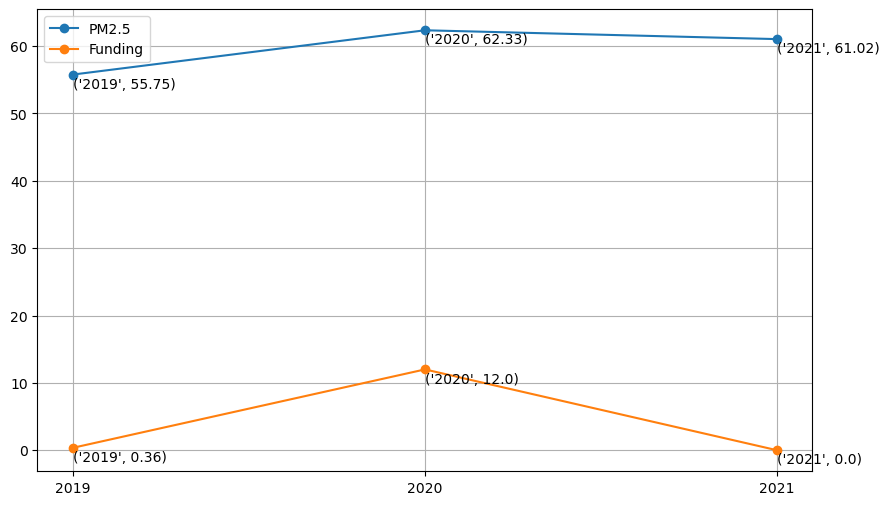

In [187]:
assam_data=data_set[data_set['state']=='Assam']
assam_2021=assam_data[assam_data['Timestamp'].str.slice(0,4) == '2021']['PM2.5'].mean()
assam_2020=assam_data[assam_data['Timestamp'].str.slice(0,4) == '2020']['PM2.5'].mean()
assam_2019=assam_data[assam_data['Timestamp'].str.slice(0,4) == '2019']['PM2.5'].mean()
assam_pm25_data=[assam_2019,assam_2020,assam_2021]
year_xlabel=['2019','2020','2021']
NCAP_2019=NCAP_funding[NCAP_funding['State']=='Assam']['Amount released during FY 2019-20'].str.replace('-','0').astype(float).sum()
NCAP_2020=NCAP_funding[NCAP_funding['State']=='Assam']['Amount released during FY 2020-21'].str.replace('-','0').astype(float).sum()
NCAP_2021=NCAP_funding[NCAP_funding['State']=='Assam']['Amount released during FY 2021-22'].str.replace('-','0').astype(float).sum()
NCAP_funding_data=[NCAP_2019,NCAP_2020,NCAP_2021]
fig,ax=plt.subplots(figsize=(10,6))
ax.plot(year_xlabel,assam_pm25_data,label='PM2.5',marker='o')
ax.plot(year_xlabel,NCAP_funding_data,label='Funding',marker='o')
for i in range(3):
    ax.text(year_xlabel[i],assam_pm25_data[i]-2,(year_xlabel[i],round(assam_pm25_data[i],2)))
    ax.text(year_xlabel[i],NCAP_funding_data[i]-2,(year_xlabel[i],round(NCAP_funding_data[i],2)))
ax.legend()
ax.grid()
plt.show()
#An increase in NCAP funding for Assam has not shown a clear or noticeable improvement in air quality based on the PM2.5 trends.

Q3]

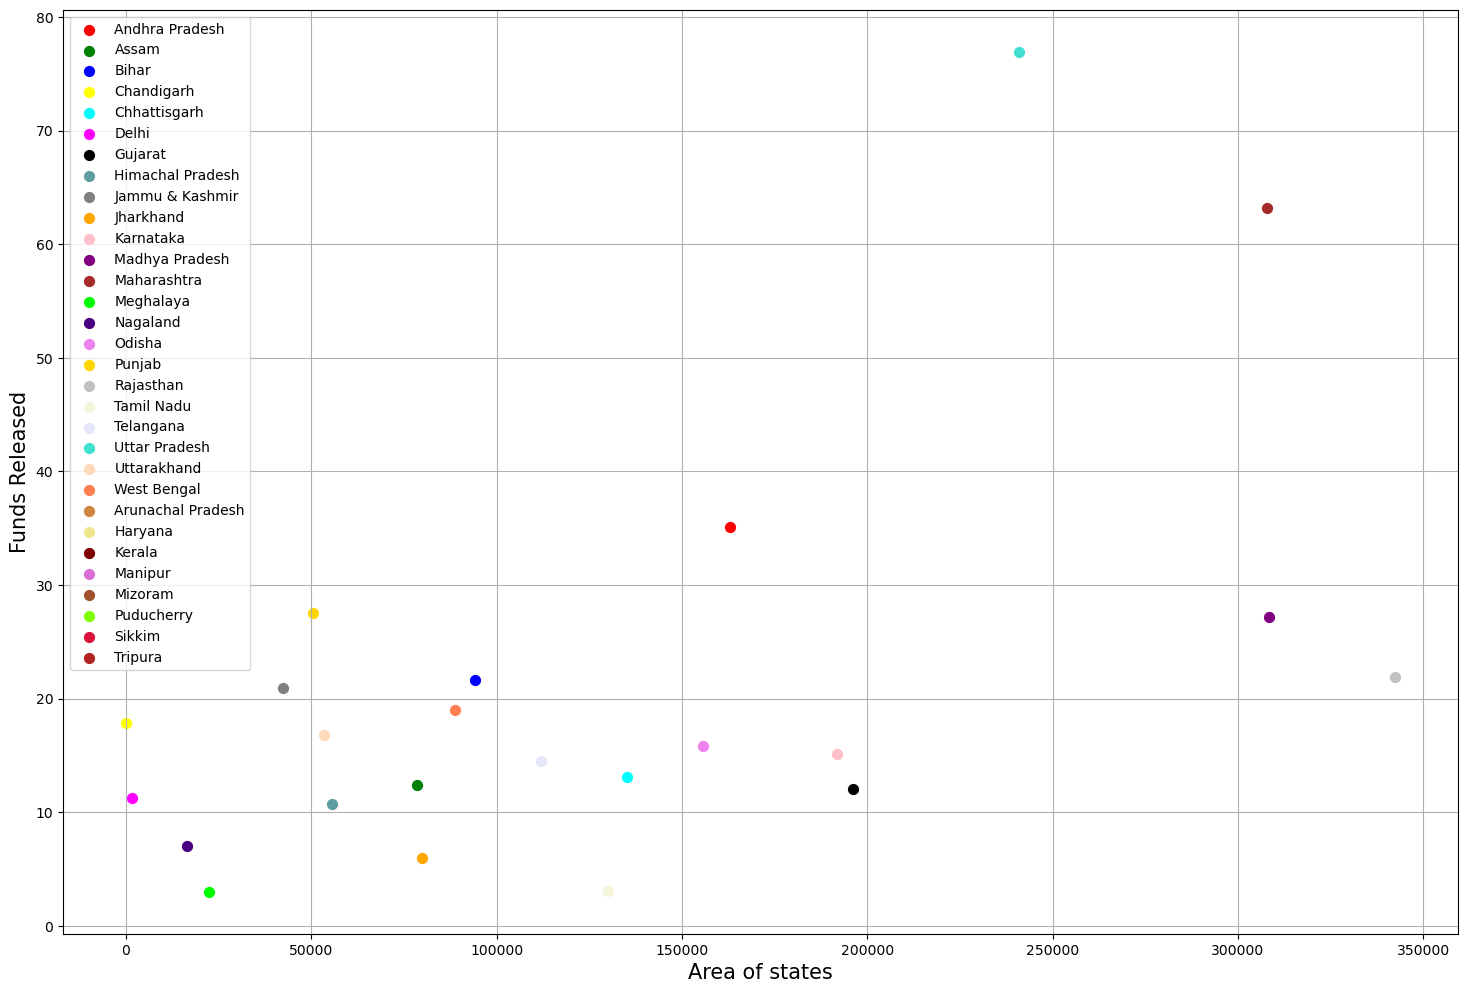

31


In [189]:
total_funding=NCAP_funding.groupby('State')['Total fund released'].sum()
state_area=State_data.set_index('State')['Area (km2)']
df_data=pd.concat([total_funding,state_area],axis='columns')

##  Fixing Spelling mismatch in data
df_data=df_data.drop('Jammu and Kashmir')
df_data.loc['Jammu & Kashmir','Area (km2)']=42241
total_fund_released=df_data['Total fund released']
area_km2=df_data['Area (km2)']
fig1,ax1 = plt.subplots(figsize=(18,12))
colours=colors= [
    'red', 'green', 'blue', 'yellow', 'cyan', 'magenta', 'black', 'cadetblue',
    'gray', 'orange', 'pink', 'purple', 'brown', 'lime', 'indigo', 'violet',
    'gold', 'silver', 'beige', 'lavender', 'turquoise', 'peachpuff', 'coral',
    'peru', 'khaki', 'maroon', 'orchid', 'sienna', 'chartreuse', 'crimson', 'firebrick','palegoldenrod'
]
for i in range(len(df_data.index)):
    ax1.scatter(area_km2.iloc[i],total_fund_released.iloc[i],c=colours[i],s=50,label=df_data.index[i])
ax1.grid()
ax1.legend(loc='upper left')
ax1.set_xlabel('Area of states',fontsize=15)
ax1.set_ylabel('Funds Released',fontsize=15)
plt.show()
print(len(df_data.index))

## Miscellaneous Questions 

For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [191]:
import pandas as pd

# Load dataset
df = pd.read_csv("Data.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filter data for 2023
df_2023 = df[df["Timestamp"].dt.year == 2023]

# Calculate average PM2.5 for each city
city_avg_pm25 = df_2023.groupby("city")["PM2.5"].mean()

# Find the most polluted city (highest avg PM2.5)
most_polluted_city = city_avg_pm25.idxmax()
highest_avg_pm25 = city_avg_pm25.max()

# Filter data for the most polluted city
df_city = df_2023[df_2023["city"] == most_polluted_city]

# Count total days and hazardous days (PM2.5 > 300)
total_days = df_city["Timestamp"].nunique()
hazardous_days = df_city[df_city["PM2.5"] > 300]["Timestamp"].nunique()

# Calculate percentage of hazardous days
hazardous_percentage = (hazardous_days / total_days) * 100

print(f"Most Polluted City in 2023: {most_polluted_city} (Avg PM2.5: {highest_avg_pm25:.2f} µg/m³)")
print(f"Percentage of hazardous days (>300 µg/m³): {hazardous_percentage:.2f}%")



Most Polluted City in 2023: Darbhanga (Avg PM2.5: 242.92 µg/m³)
Percentage of hazardous days (>300 µg/m³): 0.82%


Q2] Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?[1.5 Mark]

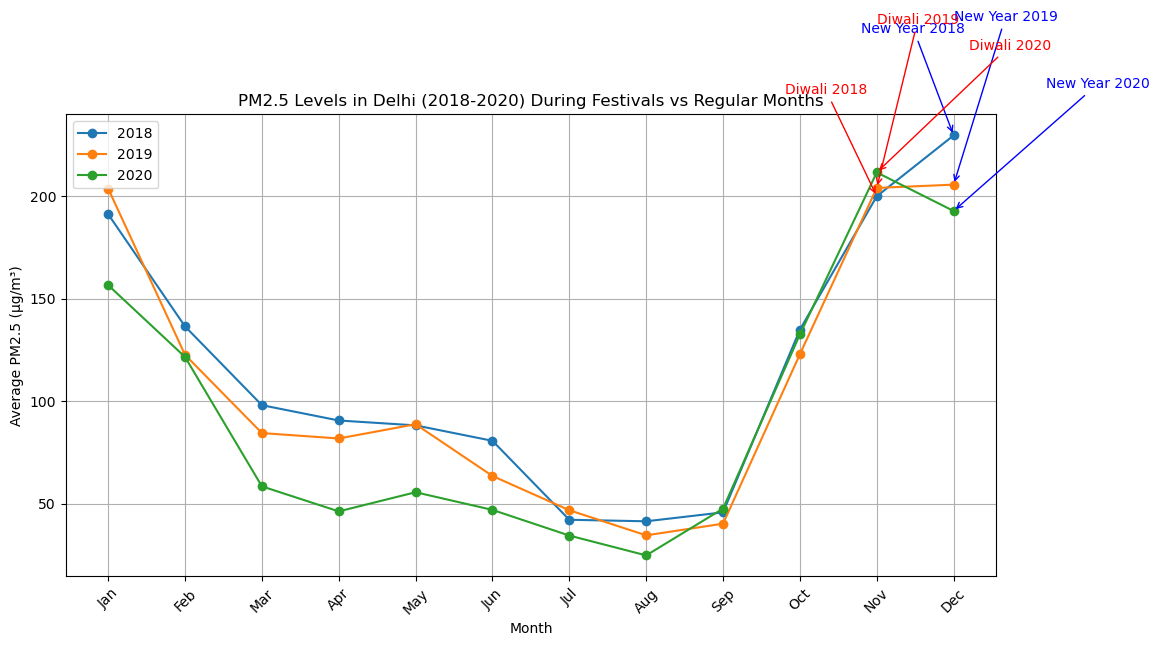

In [193]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Data.csv")
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filter for Delhi (2018-2020)
df_delhi = df[(df["city"] == "Delhi") & (df["Timestamp"].dt.year.between(2018, 2020))].copy()

# Extract Year & Month
df_delhi["Year"] = df_delhi["Timestamp"].dt.year
df_delhi["Month"] = df_delhi["Timestamp"].dt.month

# Compute monthly average PM2.5 levels
monthly_avg_pm25 = df_delhi.groupby(["Year", "Month"], as_index=False)["PM2.5"].mean()

# Plot
plt.figure(figsize=(12, 6))

for year in [2018, 2019, 2020]:
    subset = monthly_avg_pm25[monthly_avg_pm25["Year"] == year]
    plt.plot(subset["Month"], subset["PM2.5"], marker="o", label=f"{year}")

# Annotate Diwali & New Year spikes
festivals = {"Diwali": [10, 11], "New Year": [12, 1]}
colors = {"Diwali": "red", "New Year": "blue"}

# Larger offsets for better separation
offsets = {2018: (1.2, 50), 2019: (0, 80), 2020: (-1.2, 60)}

for year in [2018, 2019, 2020]:
    for festival, months in festivals.items():
        peak = monthly_avg_pm25[(monthly_avg_pm25["Year"] == year) & (monthly_avg_pm25["Month"].isin(months))]
        if not peak.empty:
            max_pm25 = peak["PM2.5"].max()
            peak_month = peak.loc[peak["PM2.5"].idxmax(), "Month"]

            # Get offset for this year (larger margins)
            x_offset, y_offset = offsets[year]

            # Dynamic placement: check if annotation is overlapping
            if peak_month > 6:
                # Place left if month is in the second half of the year
                x_offset = -x_offset
            else:
                # Place right if month is in the first half of the year
                x_offset = x_offset

            # Annotate with arrows
            plt.annotate(f"{festival} {year}", 
                         xy=(peak_month, max_pm25), 
                         xytext=(peak_month + x_offset, max_pm25 + y_offset),  
                         arrowprops=dict(arrowstyle="->", color=colors[festival]), 
                         fontsize=10, color=colors[festival])

# Formatting
plt.xlabel("Month")
plt.ylabel("Average PM2.5 (µg/m³)")
plt.title("PM2.5 Levels in Delhi (2018-2020) During Festivals vs Regular Months")
plt.xticks(range(1, 13), 
           ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], 
           rotation=45)  # Rotating labels to avoid overlap
plt.legend()
plt.grid()

plt.show()
#Yes, pollution spikes are observed during Diwali and New Year in Delhi, likely due to fireworks and increased emissions.

Q3]


State that received max funding: Assam with funding amount: 5
Data for Assam:
PM2.5 2020           62.32941
PM2.5 2023          59.685088
LESSER POLLUTION         True
Name: Assam, dtype: object
We can see that the pollution level has decreased but not by a lot.


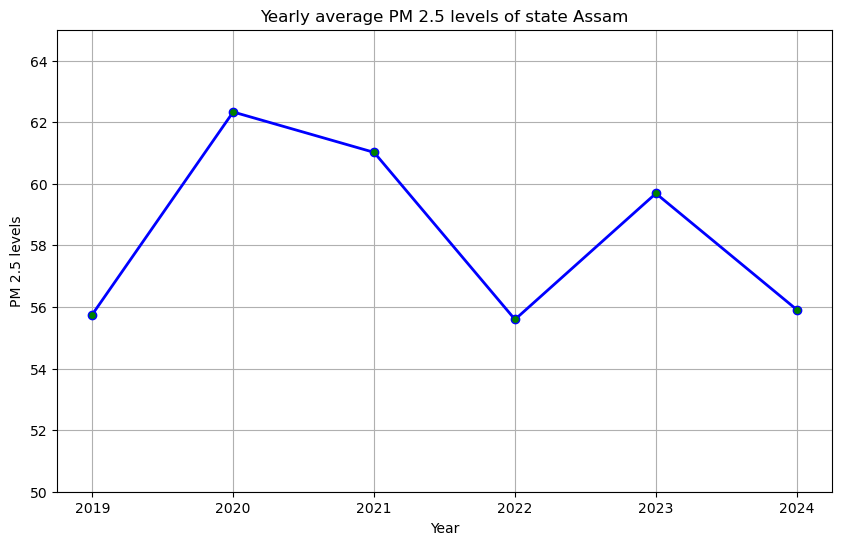

In [195]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
df = pd.read_csv("Data.csv")  # Air pollution data
NCAP_funding = pd.read_csv("NCAP_Funding.csv")  # NCAP funding data

# Convert timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Get state with highest NCAP funding in 2020
state_max = NCAP_funding.loc[NCAP_funding['Amount released during FY 2020-21'].idxmax(), ['State', 'Amount released during FY 2020-21']]
print(f"State that received max funding: {state_max['State']} with funding amount: {state_max['Amount released during FY 2020-21']}")

# Filter data for the years 2020 and 2023
data_2020 = df[df['Timestamp'].dt.year == 2020].groupby('state')['PM2.5'].mean()
data_2023 = df[df['Timestamp'].dt.year == 2023].groupby('state')['PM2.5'].mean()

# Compare pollution levels in 2023 vs 2020
comparison_df = pd.concat([data_2020, data_2023], axis=1)
comparison_df.columns = ['PM2.5 2020', 'PM2.5 2023']
comparison_df['LESSER POLLUTION'] = comparison_df['PM2.5 2023'] < comparison_df['PM2.5 2020']

# Display comparison for the state with highest NCAP funding
print(f"Data for {state_max['State']}:\n{comparison_df.loc[state_max['State']]}")
print('We can see that the pollution level has decreased but not by a lot.')

# Get yearly average PM2.5 for the state with highest NCAP funding
state_data = df[df['state'] == state_max['State']]
state_pm25_yearly_average = state_data.groupby(state_data['Timestamp'].dt.year)['PM2.5'].mean()

# Plot yearly trend for PM2.5 levels
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(state_pm25_yearly_average.index, state_pm25_yearly_average.values, marker='o', linestyle='-', color='blue', linewidth=2, mfc='green')

# Formatting the plot
ax.set_title(f'Yearly average PM 2.5 levels of state {state_max["State"]}')
ax.set_xlabel('Year')
ax.set_ylabel('PM 2.5 levels')
ax.set_ylim(50, 65)
ax.grid()

# Show the plot
plt.show()

Q4]

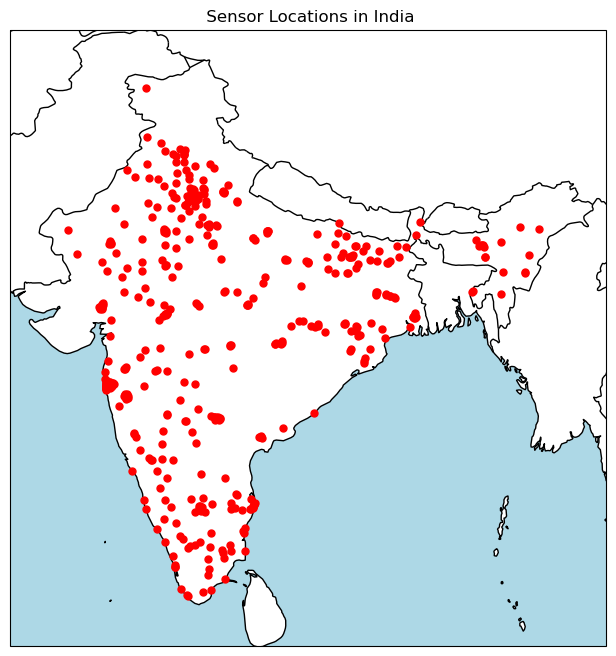

In [197]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
long_and_lat=data_set.loc[:,['address','latitude','longitude']]
long_lat_data=long_and_lat.groupby('address')[['latitude','longitude']].mean()

# Sample data: latitudes and longitudes of locations in India
locations={}
for i in range(len(long_lat_data)):
    locations[long_lat_data.iloc[i].name] = (long_lat_data.iloc[i,0],long_lat_data.iloc[i,1])

# Create a map with a specific projection (for India, PlateCarree works well)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.LAND, facecolor='white')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

ax.set_extent([68, 98, 6, 37], crs=ccrs.PlateCarree())  # [min_lon, max_lon, min_lat, max_lat]

for city, (lat, lon) in locations.items():
    ax.plot(lon, lat, marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())

ax.set_title(' Sensor Locations in India')


plt.show()

## Tell us something new
Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers.

By analyzing the dataset, we can observe a sharp drop in PM2.5 levels during the COVID-19 lockdown period (March-May 2020) compared to previous years. This suggests that reduced industrial activity, vehicle emissions, and human mobility significantly improved air quality in major cities.
Policymakers could use these findings to design policies that balance economic activity with environmental sustainability, such as partial traffic restrictions, promotion of work-from-home, or green transportation initiatives.

In [200]:
data_set=pd.read_csv(r"C:\Users\rohan\Downloads\Data.csv")
datetimes=pd.to_datetime(data_set['Timestamp'])
march_may=data_set[(datetimes.dt.month ==3) | (datetimes.dt.month ==4) | (datetimes.dt.month==5)]
datetimes2=pd.to_datetime(march_may['Timestamp'])
data={'2017': march_may[datetimes2.dt.year==2017]['PM2.5'].mean() , '2018' : march_may[datetimes2.dt.year==2018]['PM2.5'].mean(),'2019': march_may[datetimes2.dt.year==2019]['PM2.5'].mean(),
'2020':march_may[datetimes2.dt.year==2020]['PM2.5'].mean(),'2021':march_may[datetimes2.dt.year==2021]['PM2.5'].mean()}
data_df=pd.DataFrame(data,index=['March-May PM 2.5 levels'])
display(data_df)

,2017,2018,2019,2020,2021
March-May PM 2.5 levels,76.035854,73.257298,64.933347,39.581574,53.888774
